In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import statsmodels.api as sm
from prophet import Prophet
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load and prepare the data
df = pd.read_csv('/content/food_index.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
df

,Food Price Index,Meat,Dairy,Cereals,Oils,Sugar,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
Date,,,,,,,,,,,,,,,,,,,,,
1983-09-01,61.6,85.5,39.2,55.7,45.50,74.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983-10-01,61.4,86.2,39.2,52.5,43.80,67.6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983-11-01,63.2,87.6,39.2,52.8,43.72,68.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983-12-01,62.8,84.4,36.8,52.4,45.37,60.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984-01-01,62.4,80.5,38.1,52.6,44.79,62.3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01,121.7,122.0,131.3,110.2,136.10,113.9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-01,124.6,119.9,136.5,113.6,142.40,126.3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-01,126.9,119.2,139.0,114.4,152.70,129.6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:


# Remove unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df

,Food Price Index,Meat,Dairy,Cereals,Oils,Sugar
Date,,,,,,
1983-09-01,61.6,85.5,39.2,55.7,45.50,74.2
1983-10-01,61.4,86.2,39.2,52.5,43.80,67.6
1983-11-01,63.2,87.6,39.2,52.8,43.72,68.5
1983-12-01,62.8,84.4,36.8,52.4,45.37,60.8
1984-01-01,62.4,80.5,38.1,52.6,44.79,62.3
...,...,...,...,...,...,...
2024-08-01,121.7,122.0,131.3,110.2,136.10,113.9
2024-09-01,124.6,119.9,136.5,113.6,142.40,126.3
2024-10-01,126.9,119.2,139.0,114.4,152.70,129.6


In [ ]:
# 1. ARIMA Model for Food Price Index
print("Training ARIMA Model...")
# Prepare data for ARIMA
food_price_series = df['Food Price Index']


Training ARIMA Model...


In [ ]:
!pip install pmdarima

# Find optimal ARIMA parameters using auto_arima
import pmdarima as pm # Now this import should work
arima_model = pm.auto_arima(food_price_series,
                           seasonal=False,
                           stepwise=True,
                           suppress_warnings=True,
                           error_action="ignore")

In [ ]:
# Fit ARIMA model
arima_fit = arima_model.fit(food_price_series)


In [ ]:

# Make predictions
arima_forecast = arima_fit.predict(n_periods=12)
print("ARIMA Forecast for next 12 months:", arima_forecast)

ARIMA Forecast for next 12 months: 2025-01-01    126.909848
2025-02-01    126.805200
2025-03-01    126.762056
2025-04-01    126.735551
2025-05-01    126.722000
2025-06-01    126.714497
2025-07-01    126.710489
2025-08-01    126.708313
2025-09-01    126.707140
2025-10-01    126.706506
2025-11-01    126.706164
2025-12-01    126.705979
Freq: MS, dtype: float64


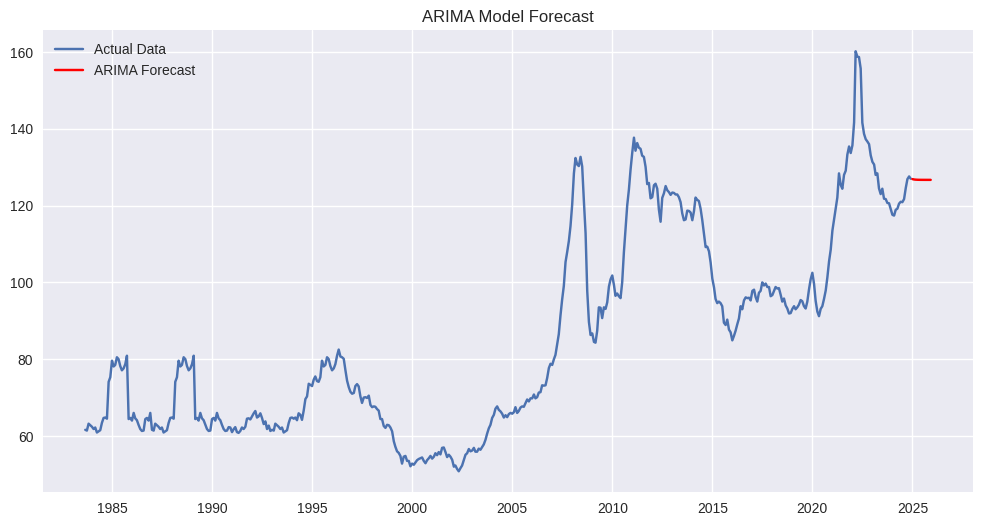

In [ ]:
# Visualization for ARIMA
plt.figure(figsize=(12, 6))
plt.plot(df.index, food_price_series, label='Actual Data')
plt.plot(pd.date_range(df.index[-1], periods=12, freq='M'), arima_forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()


In [ ]:
# 3. LSTM Model
print("\nTraining LSTM Model...")
# Prepare data for LSTM
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Food Price Index']])


Training LSTM Model...


In [ ]:
# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 12
X, y = create_sequences(scaled_data, seq_length)

In [ ]:
# Split data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
# Build LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1), return_sequences=True),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])


In [ ]:
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Make predictions
lstm_predictions = lstm_model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step


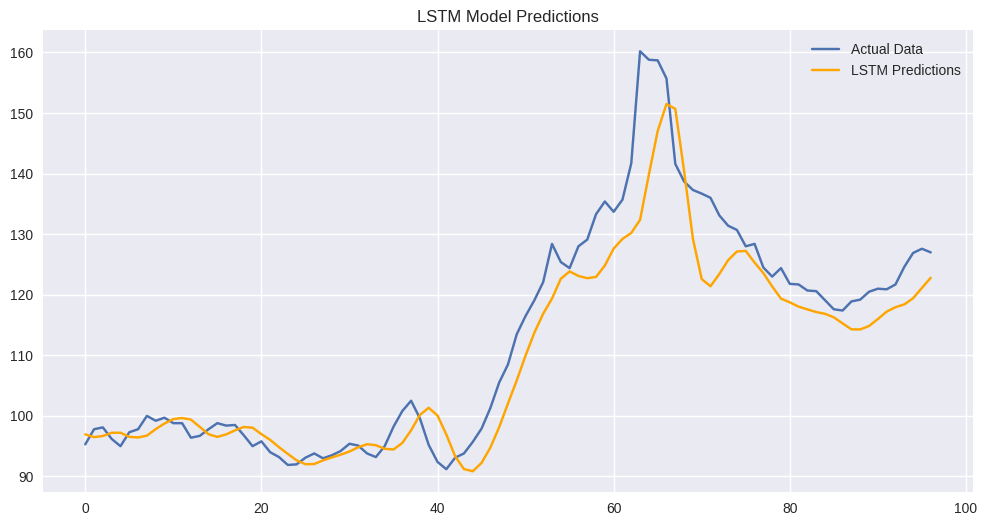

In [ ]:
# Visualization for LSTM
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Data')
plt.plot(range(len(lstm_predictions)), scaler.inverse_transform(lstm_predictions), label='LSTM Predictions', color='orange')
plt.title('LSTM Model Predictions')
plt.legend()
plt.show()

In [ ]:
# 4. Random Forest Model
print("\nTraining Random Forest Model...")
# Prepare features
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Quarter'] = df.index.quarter


Training Random Forest Model...


In [ ]:
feature_columns = ['Year', 'Month', 'Quarter', 'Meat', 'Dairy', 'Cereals', 'Oils', 'Sugar']
target = 'Food Price Index'

X = df[feature_columns]
y = df[target]


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions
rf_predictions = rf_model.predict(X_test)

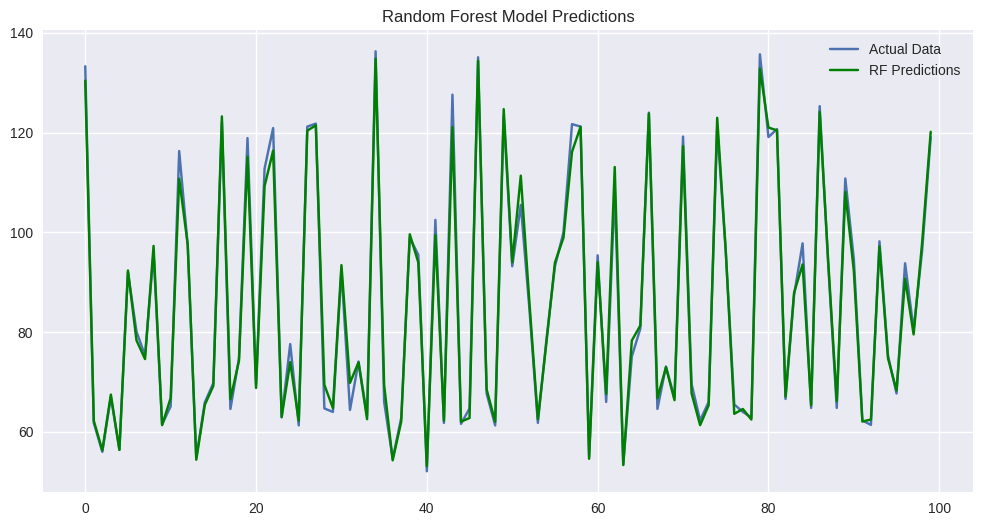

In [ ]:
# Visualization for Random Forest
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test.values, label='Actual Data')
plt.plot(range(len(rf_predictions)), rf_predictions, label='RF Predictions', color='green')
plt.title('Random Forest Model Predictions')
plt.legend()
plt.show()

In [ ]:
# Feature importance from Random Forest
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

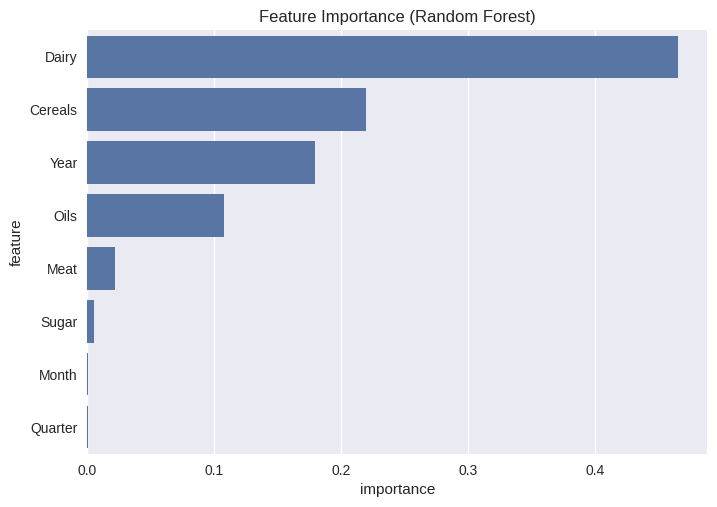

In [ ]:
# Bar plot for feature importance
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance (Random Forest)')
plt.show()

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, f1_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Calculate metrics for each model
print("Calculating evaluation metrics...")

# Function to calculate MAPE (Mean Absolute Percentage Error)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Calculating evaluation metrics...


In [ ]:
# Initialize dictionary to store metrics
metrics = {
    'ARIMA': {},
    'LSTM': {},
    'Random Forest': {},
    'Isolation Forest': {}
}

In [ ]:
# 1. ARIMA Evaluation
arima_predictions = arima_model.predict(n_periods=len(y_test))
metrics['ARIMA']['RMSE'] = np.sqrt(mean_squared_error(y_test, arima_predictions))
metrics['ARIMA']['MAE'] = mean_absolute_error(y_test, arima_predictions)
metrics['ARIMA']['MAPE'] = calculate_mape(y_test, arima_predictions)

In [ ]:
# 3. Random Forest Evaluation
metrics['Random Forest']['RMSE'] = np.sqrt(mean_squared_error(y_test, rf_predictions))
metrics['Random Forest']['MAE'] = mean_absolute_error(y_test, rf_predictions)
metrics['Random Forest']['MAPE'] = calculate_mape(y_test, rf_predictions)

In [ ]:
# 4. Isolation Forest Evaluation (Anomaly Detection)
# Creating true anomaly labels (assuming extreme values are anomalies)
z_scores = np.abs((df['Food Price Index'] - df['Food Price Index'].mean()) / df['Food Price Index'].std())
true_anomalies = (z_scores > 2).astype(int)  # Values more than 2 standard deviations away

# Initialize and fit Isolation Forest model
isolation_forest = IsolationForest(contamination='auto', random_state=42) # Assuming you want to use 'auto' for contamination
anomalies = isolation_forest.fit_predict(df[['Food Price Index']]) # Assuming you want to detect anomalies in the 'Food Price Index' column

predicted_anomalies = (anomalies == -1).astype(int)

In [ ]:
metrics['Isolation Forest']['Precision'] = precision_score(true_anomalies, predicted_anomalies)
metrics['Isolation Forest']['Recall'] = recall_score(true_anomalies, predicted_anomalies)
metrics['Isolation Forest']['F1'] = f1_score(true_anomalies, predicted_anomalies)

In [ ]:
# Create visualization plots
plt.style.use('seaborn-v0_8') # Use the default Seaborn style
# or
# plt.style.use('seaborn-v0_8-darkgrid') # Use a specific Seaborn style like 'darkgrid'